# **Resolución Laboratorio #3**
**Implementación del Algoritmo de Regresión Lineal**

**Integrantes:**

1) Francisco Javier González Alfaro GA101522

2) Francisco López Guardado LG100422

3) David Gilberto Castellanos CC202822

In [ ]:
# Se instala la librería sklearn, para utilizar la regresión lineal.
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=d56d643e49ea9509bc6ab569a4e208e13b96f782380c9c03fe0f21fa79b5b656
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [ ]:
# Importar librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#cargamos los datos de entrada sobre historico de precios del bitcoin descargado de la pagina de Kaggle
data = pd.read_csv("https://raw.githubusercontent.com/dgca77/DataSet/main/coin_Bitcoin.csv")
#veamos las dimensiones y registros que contiene el dataset
data.shape

(2991, 10)

In [ ]:
#Son 2991 registros con 10 columnas. listamos los primeros registros del dataframe
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [ ]:
# listamos algunas estadísticas de nuestros datos
data.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


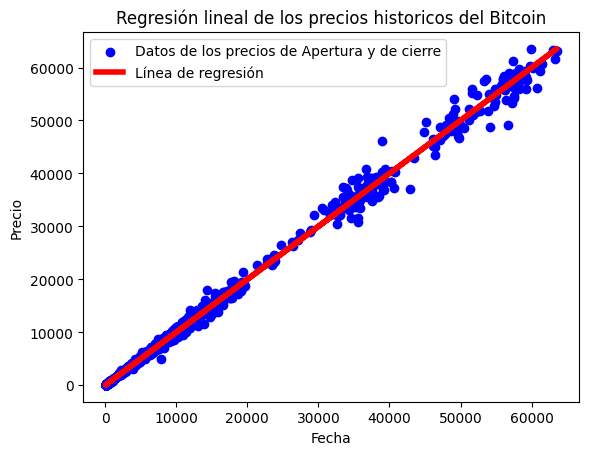

In [ ]:
# Asignamos la variable de entrada X para entrenamiento, y las etiquetas Y.
dataOpen = data[["Open"]]
X_train = np.array(dataOpen)
y_train = data['Close'].values

# Ordenamos el data frame por fecha de forma ascendente
data = data.sort_values('Date', ascending=True)

# Crear el modelo de regresión lineal
regresion = linear_model.LinearRegression()

# Se entrenan los modelos
regresion.fit(X_train, y_train)

# Se realizan las predicciones con respecto a los datos de precios de apertura 
y_pred = regresion.predict(X_train)

# Graficamos los resultados
plt.scatter(X_train, y_train, color='b', label='Datos de los precios de Apertura y de cierre')
plt.plot(X_train, y_pred, color='r', label='Línea de regresión', linewidth=4)
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Regresión lineal de los precios historicos del Bitcoin')
plt.legend()
plt.show()

In [ ]:
# Veamos los coeficienetes obtenidos
print('Coeficientes: \n', regresion.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Termino Independiente: \n', regresion.intercept_)
# Calculamos el score R^2
print('Score R^2:', r2_score(y_train, y_pred))
# Error cuadrático medio
print("Error cuadrático medio: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza
print('Varianza Explicada: %.2f\n' % r2_score(y_train, y_pred))

Coeficientes: 
 [0.99953912]
Termino Independiente: 
 14.23219599942422
Score R^2: 0.9972933057869581
Error cuadrático medio: 345388.62
Varianza Explicada: 1.00



**Interpretacion de los datos**
Se puede observar que desde el 2013, la subida del precio de cierre del bitcoin ha sido abismal hasta el 2021, y la linea de tendencia que se observa de color azul representa la prediccion correctamente.

Al validar el coeficiente obtenido, mas el ECM y el puntaje de varianza, se puede decir que los datos estan balanceados y correctamente implementado el algoritmo de regresion lineal

Podemos finalizar diciendo que el algoritmo de regresión lineal ayuda a calcular una relación lineal entre una variable independiente y otra dependiente y a continuación utilizar esta relación para la predicción. 